In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# 4 Kinematical signature
Aug 30, 2017

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/KinematicalSignature/'

# pairs of tracks at close proximity

In [3]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


In [4]:
pureff_MCbnbDATAcosmic

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,no cut,100.0% (3814),100.0% (4001),100.0% (22562),100.0% (1234)
PIDa,79.9%,45.6%,76.1%,14.0%,${PID}_a>12$,79.9% (3046),38.4% (1536),9.3% (2102),76.1% (939)
length,64.0%,59.4%,63.9%,19.2%,$l_{\mu}>l_{p}$,64.0% (2440),20.3% (812),3.8% (855),63.9% (789)
non-collinearity,58.5%,70.8%,61.4%,24.0%,"$|\theta_{1,2}-90^0|<60^0$",58.5% (2231),14.2% (570),1.6% (351),61.4% (758)
vertex activity,34.2%,78.3%,53.2%,39.4%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",34.2% (1306),5.9% (235),0.6% (127),53.2% (657)
delta phi,24.1%,87.7%,47.9%,56.3%,$|\Delta \phi - \pi|<40^0$,24.1% (921),2.1% (85),0.2% (44),47.9% (591)
theta_pq,17.5%,95.4%,39.4%,69.4%,$\theta_{pq}<25^0$,17.5% (668),0.8% (32),0.0% (0),39.4% (486)
soft Pt,20.2%,94.6%,42.9%,65.1%,$p_{t}<0.35$ GeV/c,20.2% (769),1.1% (43),0.0% (1),42.9% (529)
soft Pmiss,16.3%,95.4%,37.3%,70.7%,$p_{miss}<0.30$ GeV/c,16.3% (621),0.7% (29),0.0% (1),37.3% (460)
tight Pt,9.3%,95.7%,22.4%,74.9%,$p_{t}<0.15$ GeV/c,9.3% (354),0.4% (16),0.0% (0),22.4% (277)


## 4.I The reconstructed momentum of the muon and the proton candidates

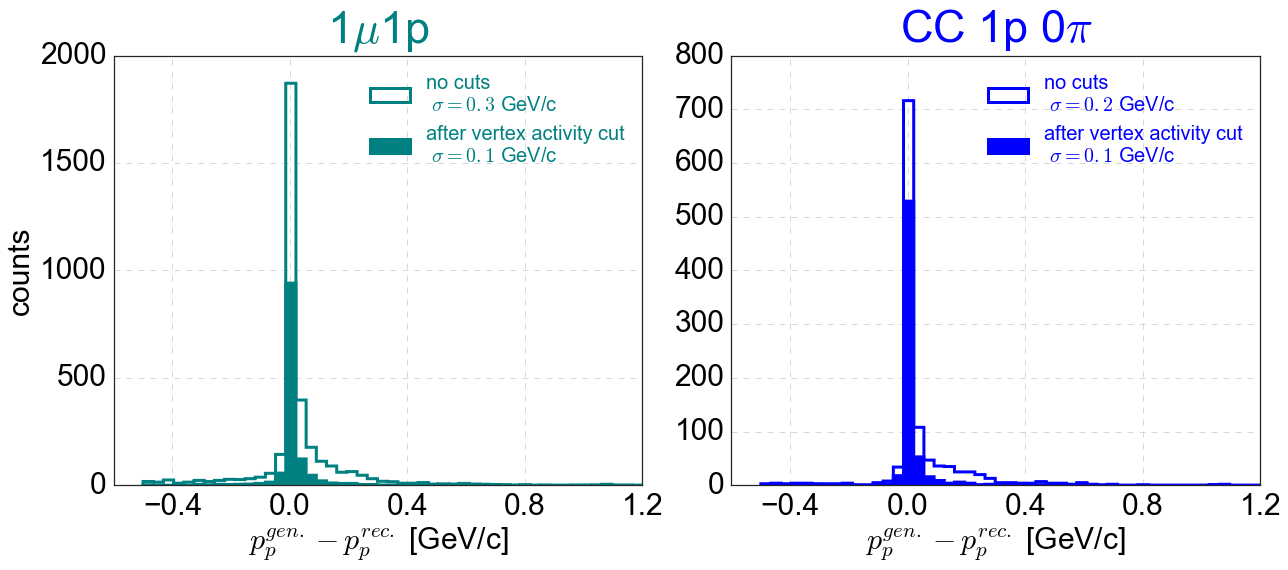

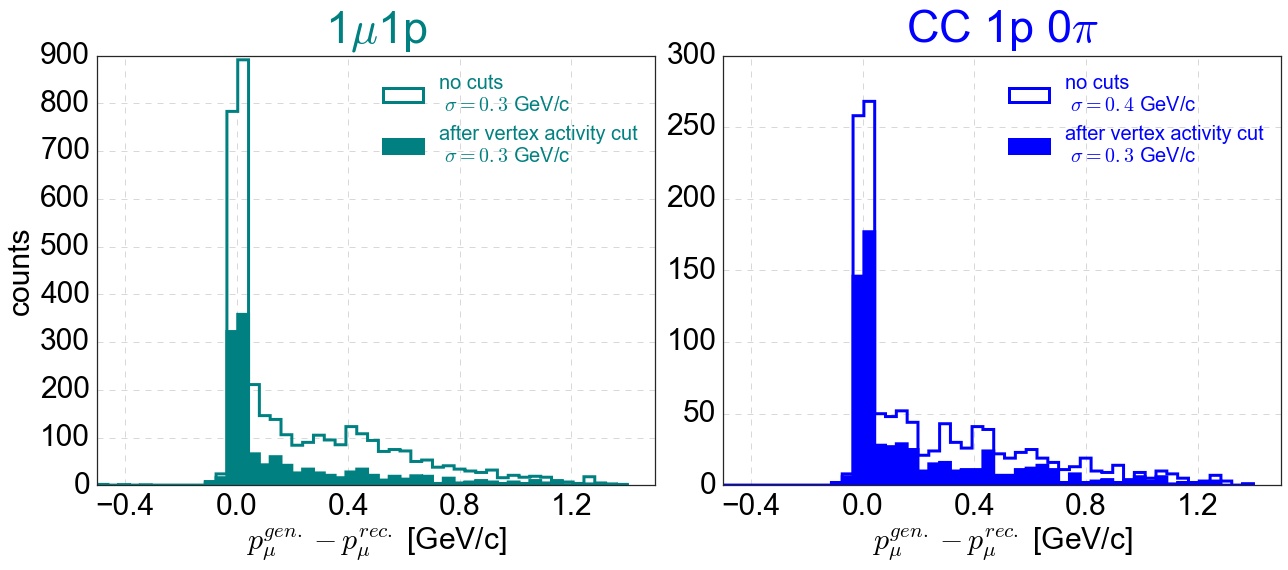

In [41]:
for particle,p_name,xmax in zip(['p','mu'],['p','\\mu'],[1.2,1.4]):
    fig=plt.figure(figsize=(18,8))
    for i,index in enumerate([0,3]):
        pair_type,label,cmap,color = get_pair_hpars(index)
        ax = fig.add_subplot(1,2,i+1)
        ax.set_title(label,fontsize=45,y=1.02,color=color)
        for cut_name,label in zip(['no cut','vertex activity']
                                  ,['no cuts','after vertex activity cut']):
            sample = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]                    
            delta = (sample['truth_P'+particle] - sample['reco_P'+particle])
            small_sample = sample[np.abs(sample['truth_P'+particle] - sample['reco_P'+particle])<2]
            delta_small_sample = small_sample['truth_P'+particle] - small_sample['reco_P'+particle]
            sigma = np.std(delta_small_sample)

            h,bins,_=ax.hist(delta,bins=np.linspace(-0.5,xmax,50)
                             ,histtype='step' if cut_name=='no cut' else 'stepfilled'
                             ,color=color
                             ,edgecolor=color
                             ,linewidth=3
                             ,label = label + '\n'+ r' $\sigma=%.1f$'%sigma+' GeV/c')                
        set_axes(ax,'$p_{'+p_name+'}^{gen.}-p_{'+p_name+'}^{rec.}$ [GeV/c]' , 'counts' if i==0 else ''
                 ,fontsize=30,do_add_grid=True
                 ,xticks=[-0.4,0,0.4,0.8,1.2]
                )
    
        leg = plt.legend(fontsize=20)
        for text in leg.get_texts():
            text.set_color(color)
    plt.tight_layout()
    fig.savefig(figures_path+'P'+particle+'_gen_reco.pdf')

### 4.II Coplanarity - ∆φ between tracks

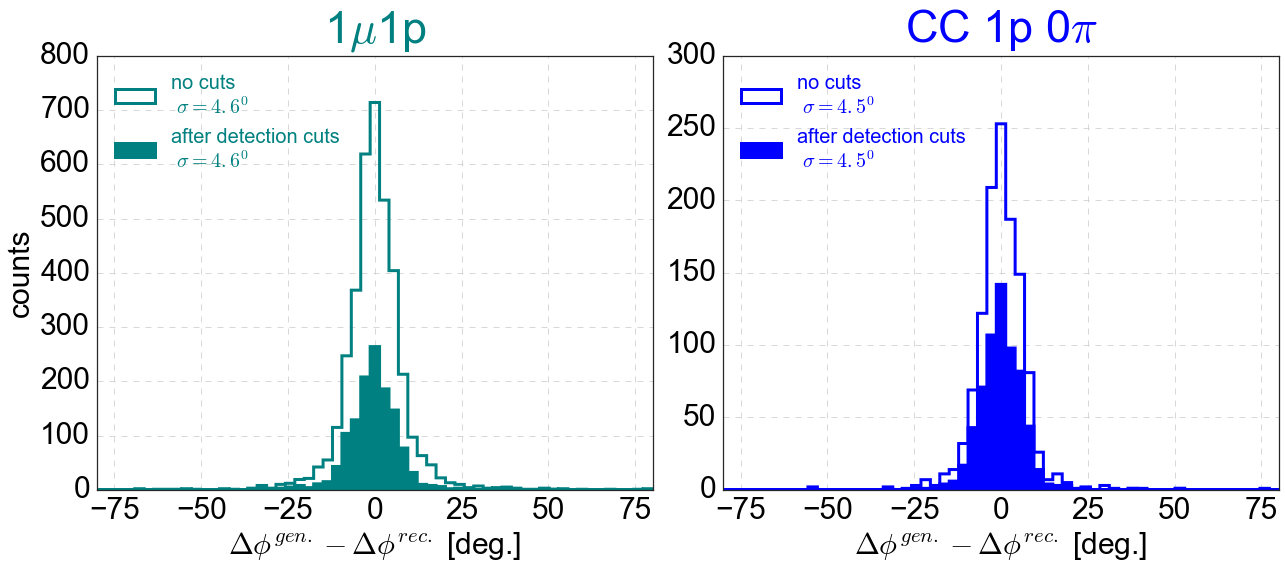

In [57]:
# MC-bnb/DATA-cosmic
fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type,label,cmap,color = get_pair_hpars(index)
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)

    for cut_name,label in zip(['no cut','vertex activity']
                                  ,['no cuts','after detection cuts']):
        sample = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]                    
        delta = 180./np.pi*(sample['truth_P'+particle+'_phi'] - sample['reco_P'+particle+'_phi'])
        small_sample = sample[np.abs(sample['truth_P'+particle+'_phi'] - sample['reco_P'+particle+'_phi'])<10*np.pi/180]
        delta_small_sample = 180./np.pi*(small_sample['truth_P'+particle+'_phi'] - small_sample['reco_P'+particle+'_phi'])
        sigma = np.std(delta_small_sample)
        h,bins,_=ax.hist(delta,bins=np.linspace(-80,80,60)
                             ,histtype='step' if cut_name=='no cut' else 'stepfilled'
                             ,color=color
                             ,edgecolor=color
                             ,linewidth=3
                             ,label = label + '\n'+ r' $\sigma=%.1f$'%sigma+'$^0$')                
        set_axes(ax,r'$\Delta \phi^{gen.}-\Delta \phi^{rec.}$ [deg.]' , 'counts' if i==0 else ''
                 ,fontsize=30,do_add_grid=True
                 ,xticks=[-75,-50,-25,0,25,50,75]
                )    
        leg = plt.legend(fontsize=20,loc='upper left')
        for text in leg.get_texts():
            text.set_color(color)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'delta_phi_gen_reco.pdf')

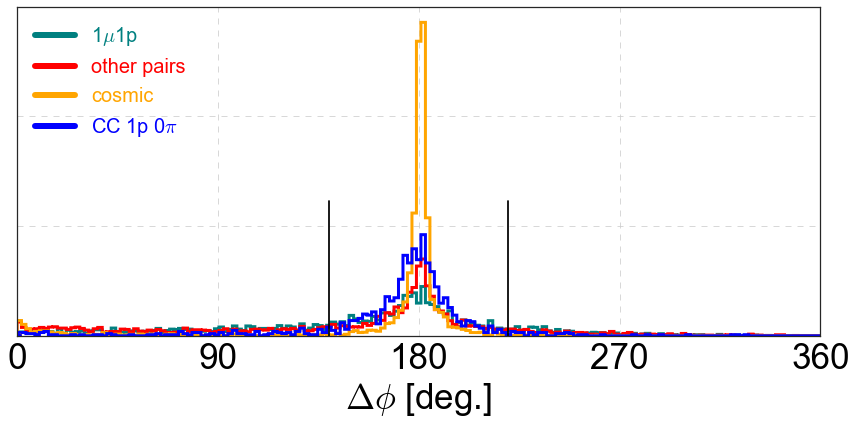

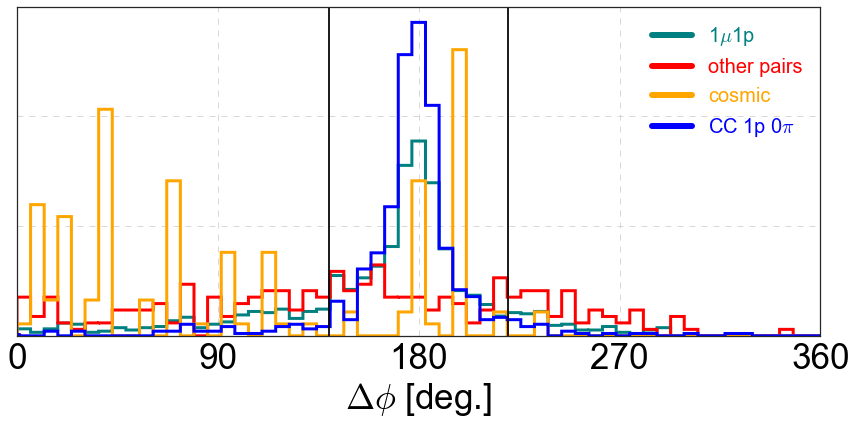

In [17]:
plot_feature_pairs(reduced_samples=reduced_MCbnbDATAcosmicSamples
                   ,cut_name='no cut',var='delta_phi',x_label='$\\Delta \\phi$ [deg.]',do_add_legend=True,legend_loc='upper left'
                              ,bins=np.linspace(0,360,180),figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([140,140],[0,0.05],'-',color='black')
plt.plot([220,220],[0,0.05],'-',color='black')
plt.savefig(figures_path+'DeltaPhi.pdf')

# after cut 4
plot_feature_pairs(reduced_samples=reduced_MCbnbDATAcosmicSamples
                   ,cut_name='vertex activity',var='delta_phi',x_label='$\\Delta \\phi$ [deg.]',do_add_legend=True,legend_loc='upper right'
                              ,bins=np.linspace(0,360,60),figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([140,140],[0,0.05],'-',color='black')
plt.plot([220,220],[0,0.05],'-',color='black')
plt.savefig(figures_path+'DeltaPhi_after_cut_VertexActivity.pdf')

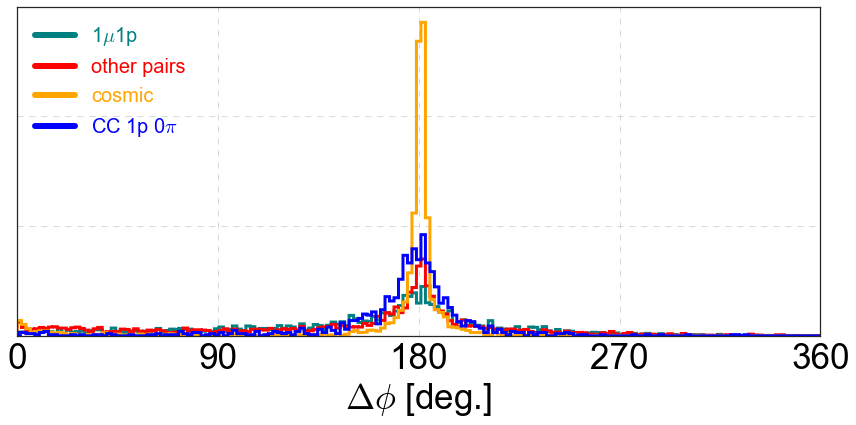

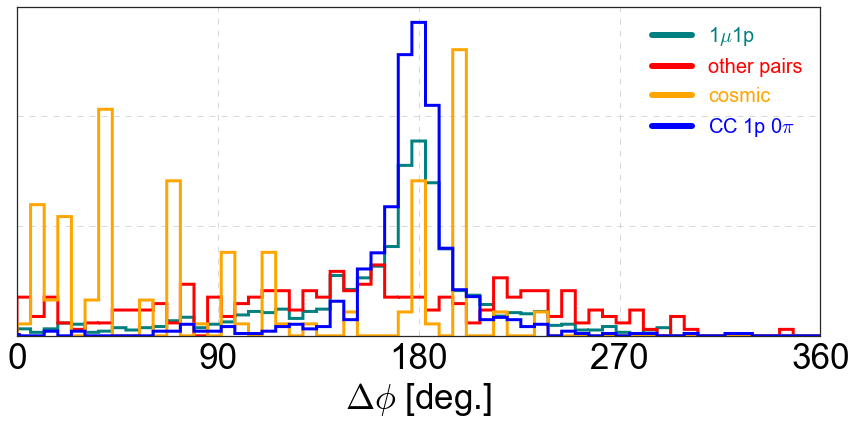

In [8]:
# MC-bnb/MC-cosmic

plot_feature_pairs(reduced_samples=reduced_MCbnbMCcosmicSamples
                   ,cut_name='no cut',var='delta_phi',x_label='$\\Delta \\phi$ [deg.]',do_add_legend=True,legend_loc='upper left'
                              ,bins=np.linspace(0,360,180),figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
# after cut 4
plot_feature_pairs(reduced_samples=reduced_MCbnbMCcosmicSamples
                   ,cut_name='vertex activity',var='delta_phi',x_label='$\\Delta \\phi$ [deg.]',do_add_legend=True,legend_loc='upper right'
                              ,bins=np.linspace(0,360,60),figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)

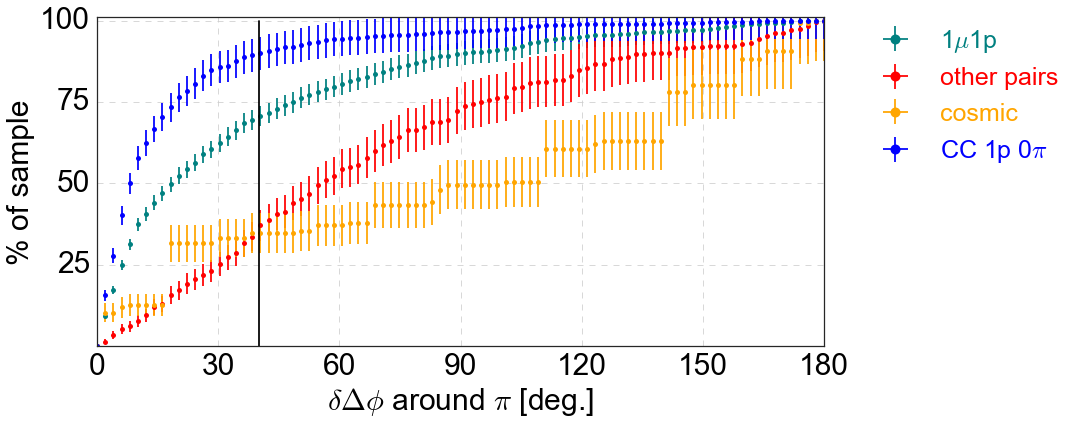

In [9]:
ax,leg=plot_cut_samples(reduced_samples=reduced_MCbnbDATAcosmicSamples
                        ,reduced_cut_name='vertex activity',do_add_legend=True,
                     cut_var ='delta_phi',cut_type= 'symmetric',x_label = '$\\delta \\Delta \\phi$ around $\\pi$ [deg.]',ticks_color='black',
                     xcenter=180, xmin=0., xmax=180 , Nbins=90,fontsize=30,figsize=(12,6))
plt.plot([40,40],[0,100],'-',color='black')
plt.savefig(figures_path+'DeltaPhi_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

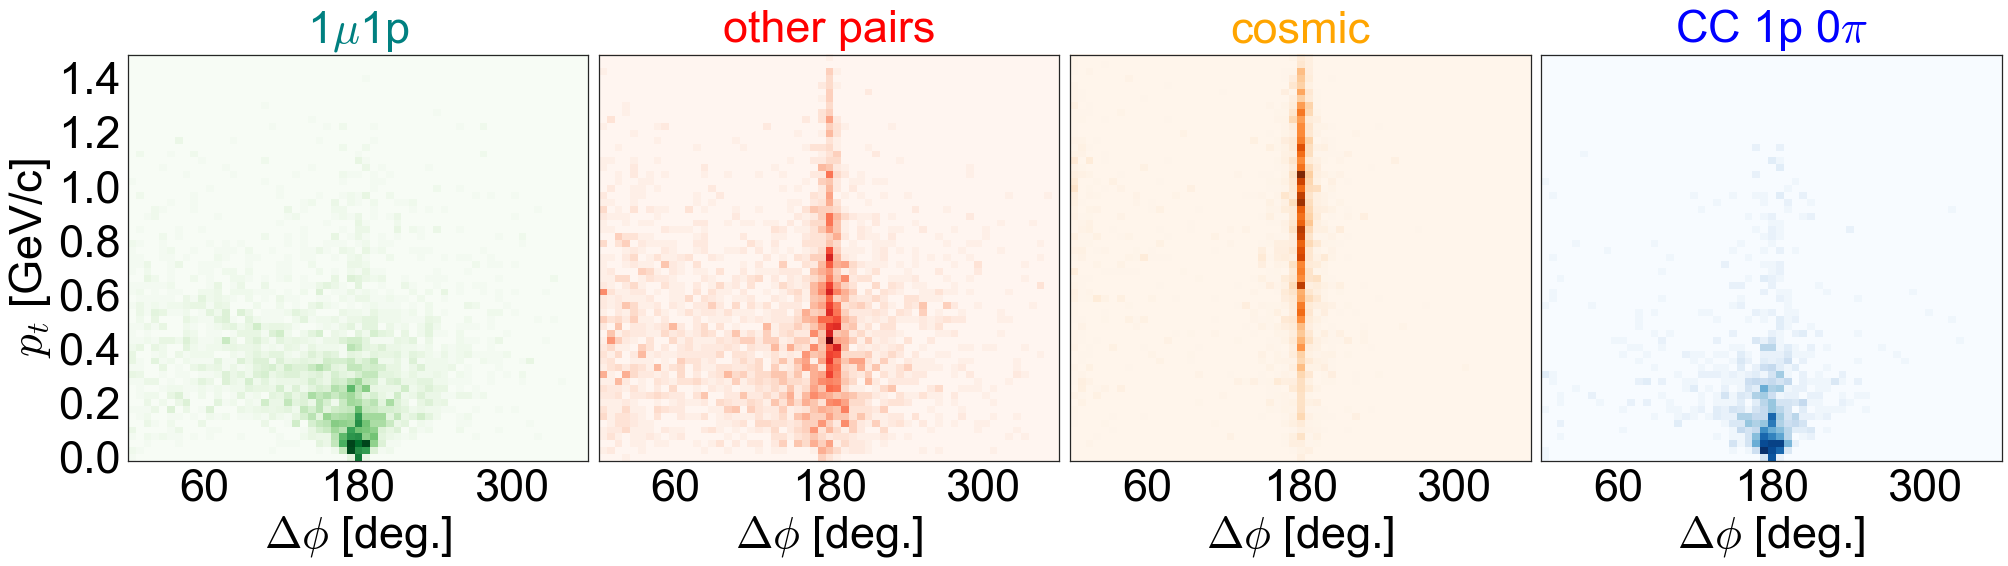

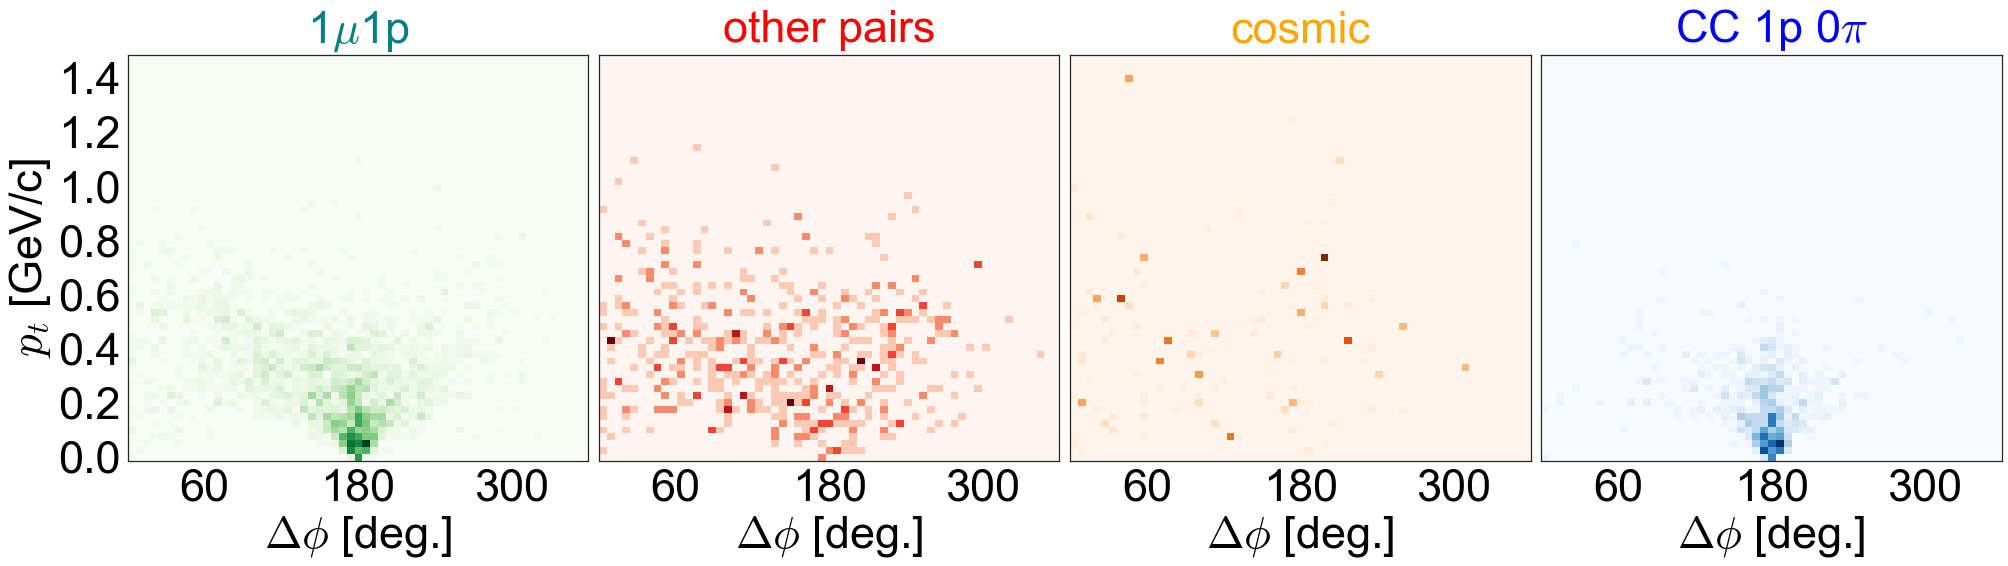

In [17]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,360,60),np.linspace(0,1.5,60))
x_label,y_label='$\\Delta \\phi$ [deg.]','$p_{t}$ [GeV/c]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['delta_phi'], 
                 sample['reco_Pt'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([60,180,300])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'DeltaPhi_vs_Pt.pdf')


fig = plt.figure(figsize=(28,8))
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbDATAcosmicSamples['non-collinearity'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['delta_phi'], 
                 sample['reco_Pt'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([60,180,300])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'DeltaPhi_vs_Pt_after_cut_VertexActivity.pdf')

## Appendix A Reconstructed $\theta (p,q)$

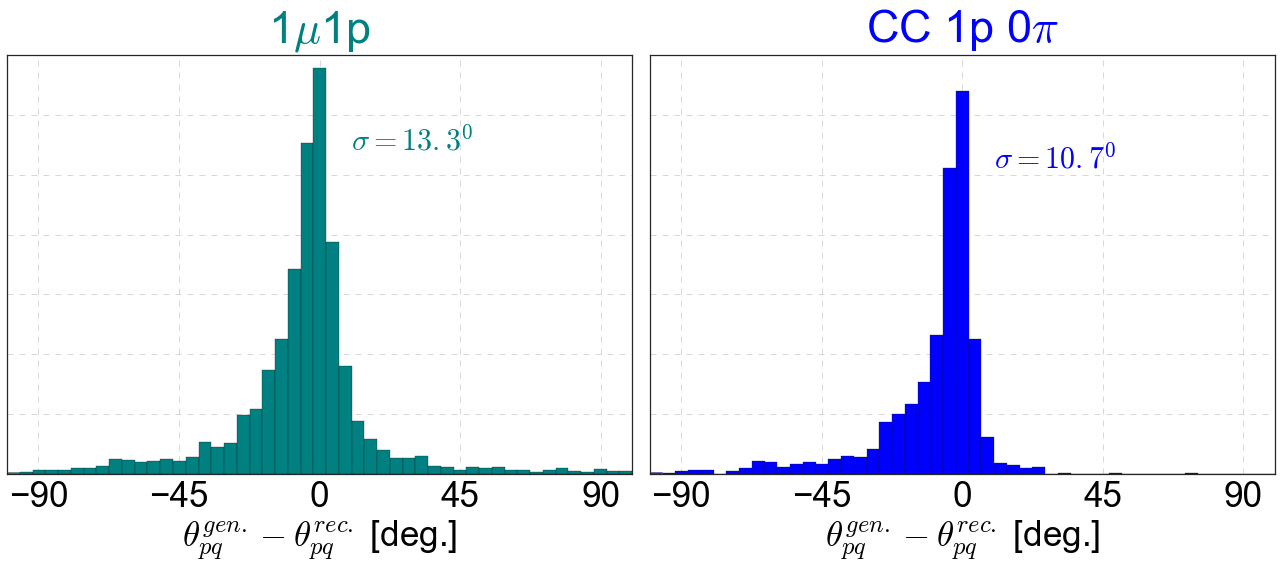

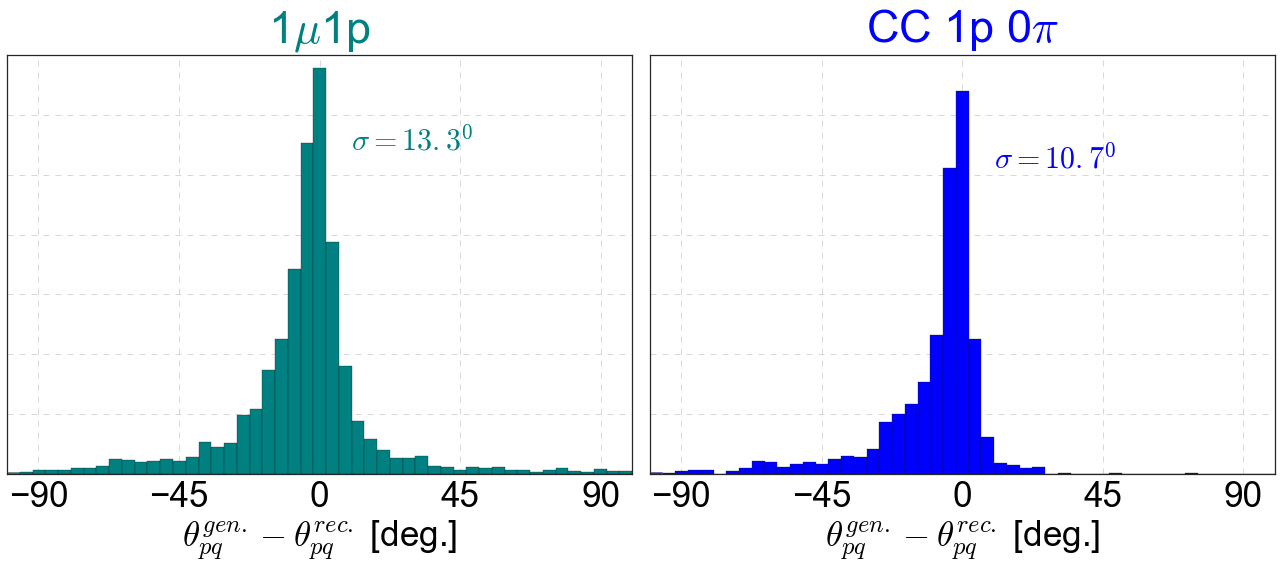

In [18]:
fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_theta_pq']-sample['reco_theta_pq'],bins=np.linspace(-100,100,50),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq}$ [deg.]' , '', fontsize=35,do_add_grid=True
             ,xticks=[-90,-45,0,45,90])
    small_sample = sample[np.abs(sample['truth_theta_pq']-sample['reco_theta_pq'])<45]
    sigma = np.std(small_sample['truth_theta_pq']-small_sample['reco_theta_pq'])
    plt.text(10,0.8*np.max(h),'$\\sigma=%.1f$'%sigma+'$^0$',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
plt.savefig(figures_path+'theta_pq_gen_reco.pdf')

fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]    

    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_theta_pq']-sample['reco_theta_pq'],bins=np.linspace(-100,100,50),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq}$ [deg.]' , '', fontsize=35,do_add_grid=True
             ,xticks=[-90,-45,0,45,90])
    small_sample = sample[np.abs(sample['truth_theta_pq']-sample['reco_theta_pq'])<45]
    sigma = np.std(small_sample['truth_theta_pq']-small_sample['reco_theta_pq'])
    plt.text(10,0.8*np.max(h),'$\\sigma=%.1f$'%sigma+'$^0$',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
plt.savefig(figures_path+'theta_pq_gen_reco_after_cut_DeltaPhi.pdf')

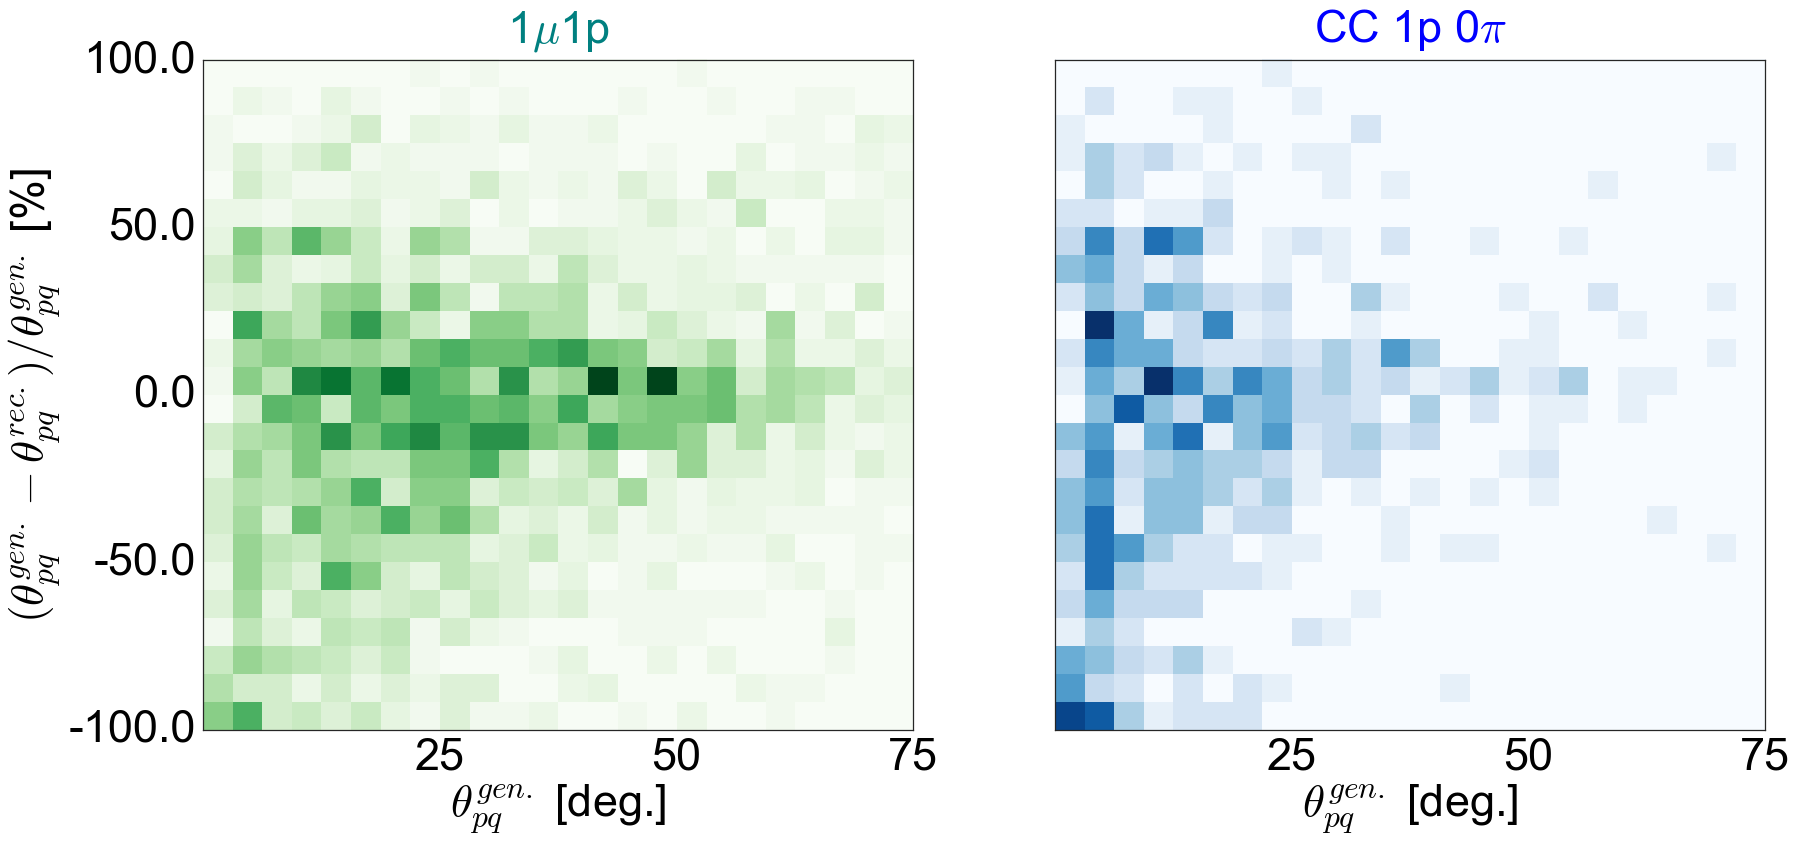

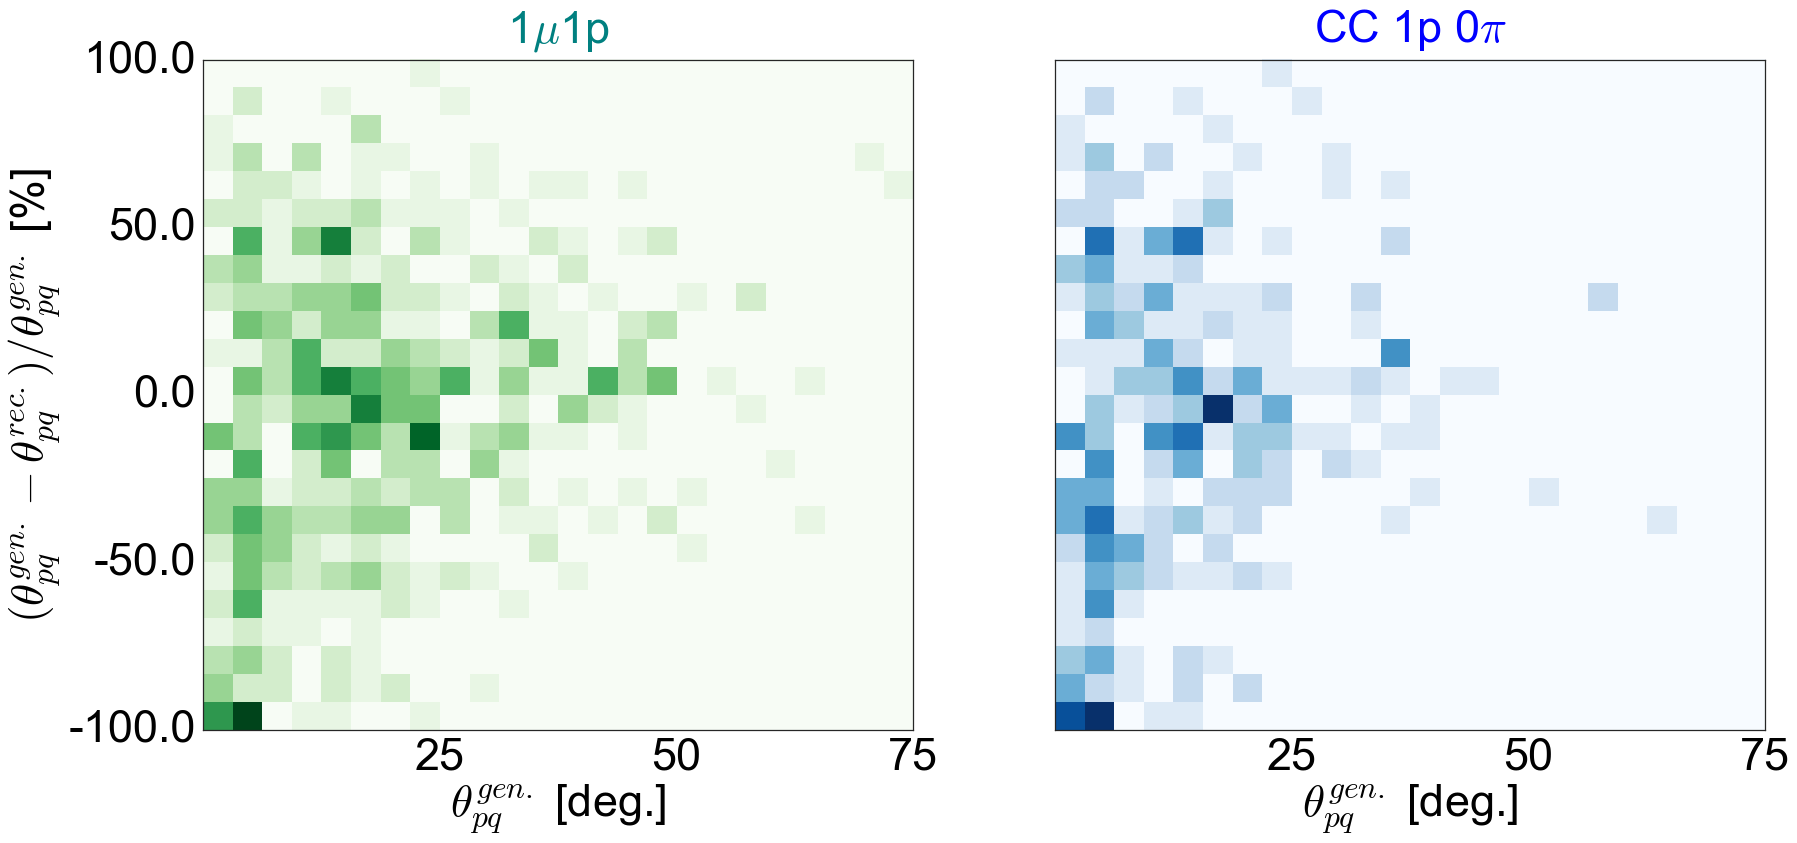

In [23]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,75,25),np.linspace(-100,100,25))
    
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_theta_pq'], 
                 100.*(sample['truth_theta_pq']-sample['reco_theta_pq'])/sample['truth_theta_pq'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$\\theta^{gen.}_{pq}$ [deg.]', y_label='$(\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq})/\\theta^{gen.}_{pq}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
fig.savefig(figures_path+'theta_pq_reconstruction.pdf')

fig = plt.figure(figsize=(28,12))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reduced_MCbnbDATAcosmicSamples['delta phi'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_theta_pq'], 
                 100.*(sample['truth_theta_pq']-sample['reco_theta_pq'])/sample['truth_theta_pq'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$\\theta^{gen.}_{pq}$ [deg.]', y_label='$(\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq})/\\theta^{gen.}_{pq}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
fig.savefig(figures_path+'theta_pq_reconstruction_after_cut_DeltaPhi.pdf')

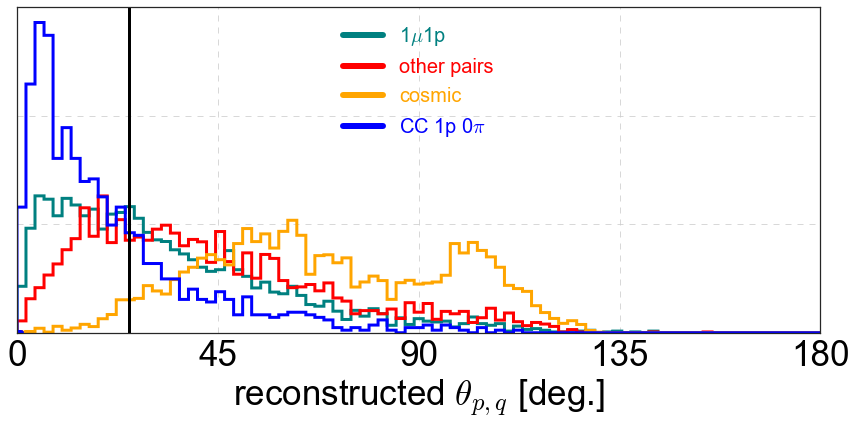

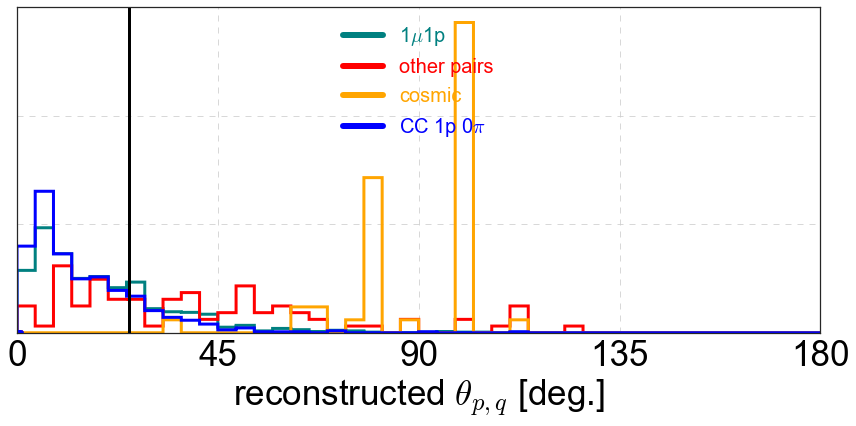

In [20]:
ax=plot_feature_pairs(cut_name='no cut',var='reco_theta_pq',x_label='reconstructed $\\theta_{p,q}$ [deg.]'
                              ,bins=np.linspace(0,180,90)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([25,25],ax.get_ylim(),'-',color='black',linewidth=3)
plt.savefig(figures_path+'theta_pq.pdf')

# after cut 5
ax=plot_feature_pairs(cut_name='delta phi',var='reco_theta_pq',x_label='reconstructed $\\theta_{p,q}$ [deg.]'
                              ,bins=np.linspace(0,180,45)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([25,25],ax.get_ylim(),'-',color='black',linewidth=3)
plt.savefig(figures_path+'theta_pq_after_cut_DeltaPhi.pdf')

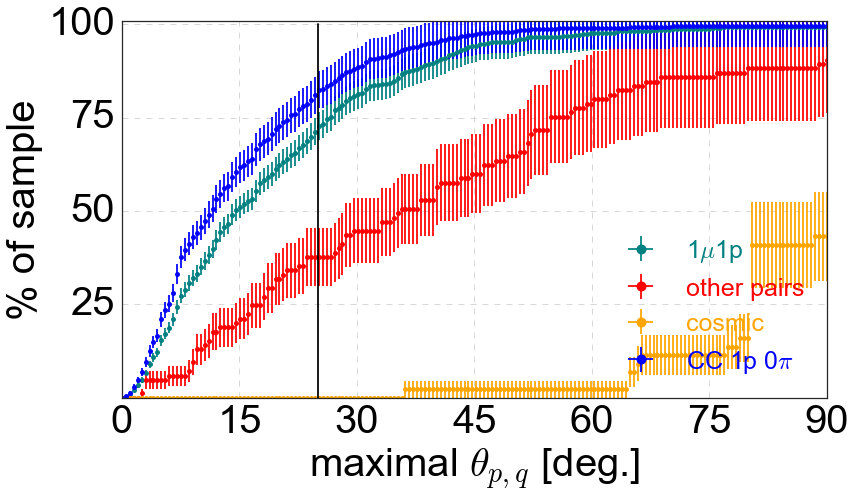

In [21]:
ax,leg=plot_cut_samples(reduced_cut_name='delta phi',do_add_legend=True,legend_fontsize=25,legend_loc='lower right'                    
                 ,cut_var ='reco_theta_pq', cut_type= 'max',ticks_color='black'                 
                 ,x_label = 'maximal $\\theta_{p,q}$ [deg.]'
                 ,xmin=0, xmax=90 , Nbins=180,fontsize=40,figsize=(12,7));
ax.plot([25,25],[0,100],'-',color='black')
plt.savefig(figures_path+'theta_pq_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

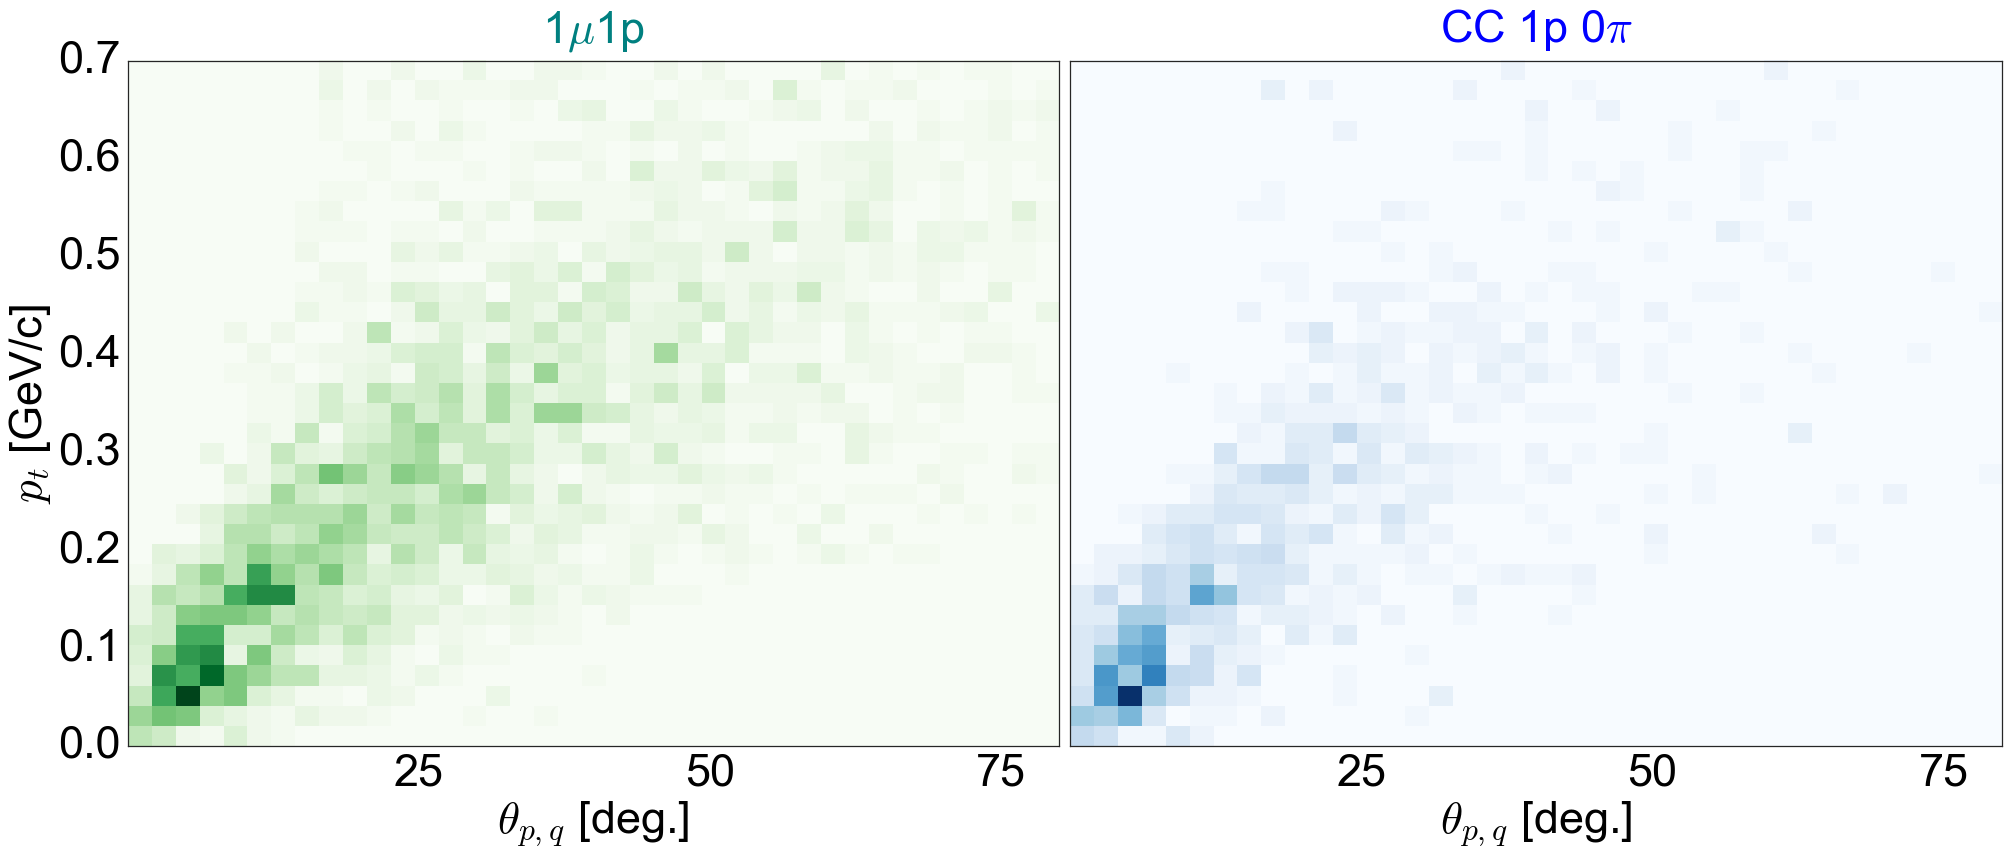

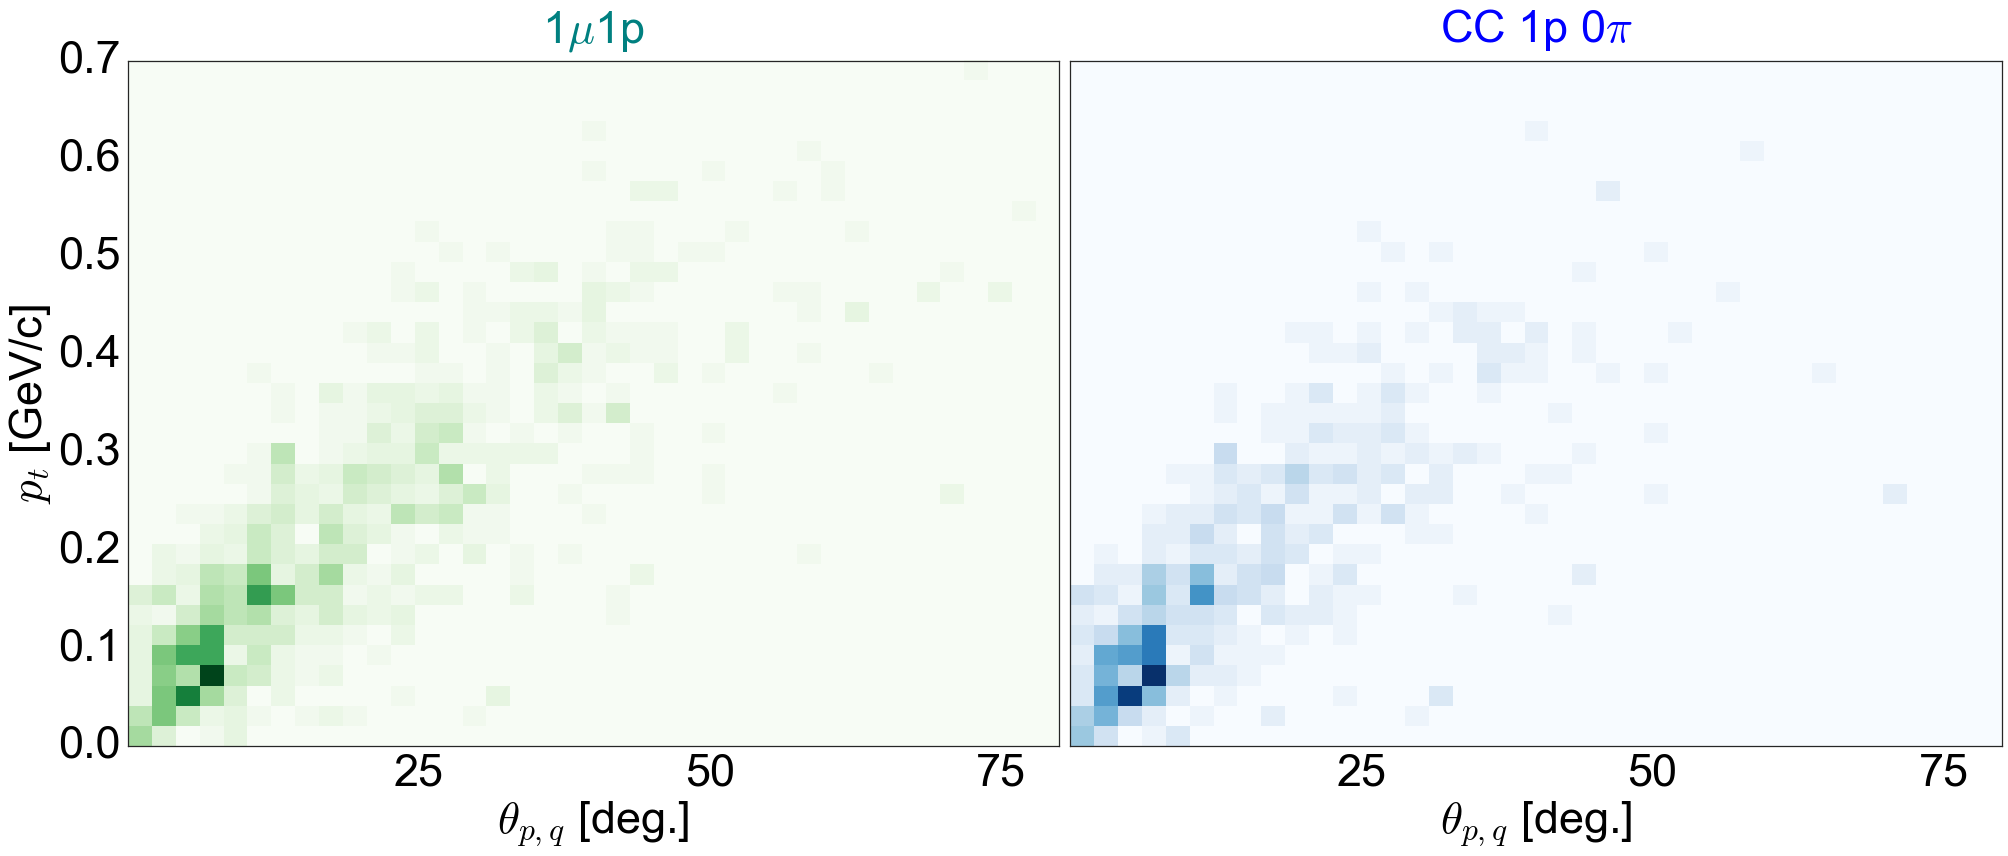

In [25]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,80,40),np.linspace(0,0.7,35))
x_label,y_label='$\\theta_{p,q}$ [deg.]','$p_{t}$ [GeV/c]'
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['reco_theta_pq'], 
                 sample['reco_Pt'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'theta_pq_vs_Pt.pdf')


fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,80,40),np.linspace(0,0.7,35))
x_label,y_label='$\\theta_{p,q}$ [deg.]','$p_{t}$ [GeV/c]'
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reduced_MCbnbDATAcosmicSamples['delta phi'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['reco_theta_pq'], 
                 sample['reco_Pt'],
                 ax=ax,fontsize=25,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'theta_pq_vs_Pt_after_cut_DeltaPhi.pdf')